<a href="https://colab.research.google.com/github/kentokura/python_medical_images/blob/master/chapter3/chap3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
from IPython.display import Image, display_png

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 3.7 画像のコントラスト

リスト 3.7.1

np.clip() : ndarrayを任意の範囲に収める
```
a = np.arange(10)
print(a)
# [0 1 2 3 4 5 6 7 8 9]

print(np.clip(a, 2, 7))
# [2 2 2 3 4 5 6 7 7 7]
```
[参考](https://www.dogrow.net/python/blog99/)

- γ ＝ 1 であれば入力値＝出力値のリニアな関係になるので画像は何も変わらない。
- γ ＜ 1 であれば暗い部分の輝度変化が強調される。
- γ ＞ 1 であれば明るい部分の輝度変化が強調される。


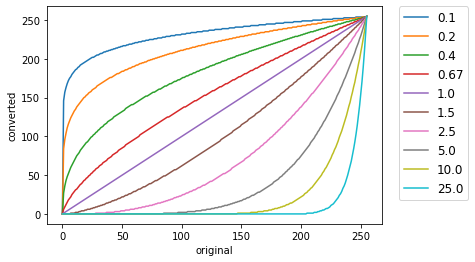

In [16]:
# ガンマ値をリスト化
gammalist = np.array([0.1, 0.2, 0.4, 0.67, 1, 1.5, 2.5, 5, 10, 25])
# ガンマ値ごとに関数を計算して表示する
for gamma in gammalist:
  var_px = np.empty(shape=256, dtype=np.uint8)
  for i in range(256):
    var_px[i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255) 
  plt.plot(var_px, label=str(gamma))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0, fontsize=12)
plt.xlabel("original")
plt.ylabel("converted")
plt.show()

リスト 3.7.2

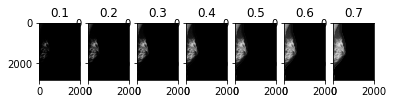

In [33]:
# ガンマ値の変数(仮で初期値を設定)
gamma = 1.0
# 処理対象の画像をロード
pixels = cv2.imread("/content/drive/My Drive/DATASET/dataset/MG_MLO_L_LEE_IR87a.png",
                    cv2.IMREAD_UNCHANGED)
# 16-bit画像であるためいったん8-bitへダウンスケール
amin=np.amin(pixels)
amax=np.amax(pixels)
scale = 255.0/(amax-amin)
values = ((pixels-amin)*scale)
values = np.clip(values, 0, 255)
img = np.uint8(values)

# ガンマカーブを使って階調変換する関数
def gamma_correction(gamma):
  # ガンマ値を使ってLUTを作成
  lookUpTable = np.empty((1, 256), np.uint8)
  for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, 1./gamma) * 255.0, 0, 255)
  return lookUpTable

# plt.figure(figsize=(28,4)) # figureの大きさを変更しておっぱいを大きく表示する
for i in [1, 2, 3, 4, 5, 6, 7]:
  gamma = round(i*0.1, 2)
  # LUT メソッドを使って画像の輝度値を変換
  imgA = cv2.LUT(img, gamma_correction(gamma))
  plt.subplot(1, 7, i)
  plt.imshow(imgA, cmap="gray")
  plt.title(str(gamma))
plt.show()